<a href="https://colab.research.google.com/github/rithu-k/task/blob/main/gripT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RITHU KRISHNAN

**GRIP TASK 1:** Predict the percentage of a student based on the no. of study hours.

In [2]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
#READING DATA TO A DATAFRAME
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()
 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


EXPLORING THE DATA



In [4]:
data.shape

(25, 2)

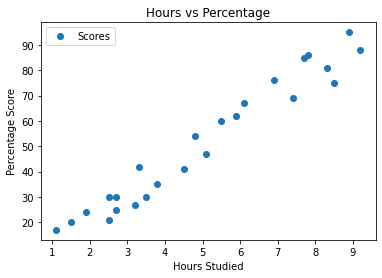

In [5]:
# VISUALIZING THE GIVEN DATA
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can clearly see a positive relation between score and study hours

SIMPLE LINEAR REGRESSION can be used for supervised machine learning (only 2 variables involved)

In [7]:
#INDEPENDENT VARIABLE x & DEPENDENT VARIABLE y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
#SPLITING DATA INTO TESTING AND TRAINING DATA (in 3:7 ratio)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0) 

TRAINING THE ALGORITHM

In [9]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


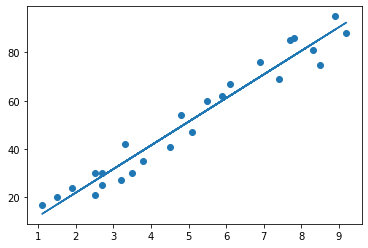

In [10]:
# VISUALIING REGRESSION LINE (y=mx+c)
line = reg.coef_*x + reg.intercept_

# Plotting testing data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [11]:
print("Intercept is :,", reg.intercept_)
print( "Coefficient is : ",reg.coef_)

Intercept is :, 2.3708153823418883
Coefficient is :  [9.78856669]


The calculation show that for every unit change in hours studied, the change in score will be 9.78%

In [12]:
#PREDICTING ON TESTING DATA
y_pred = reg.predict(x_test)

In [13]:
# THE ACTUAL vs PREDICTED VALUES OF y (for each x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


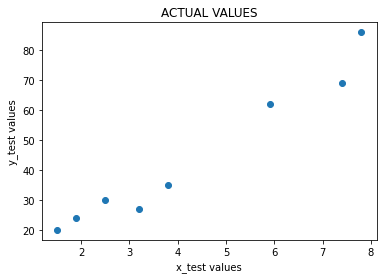

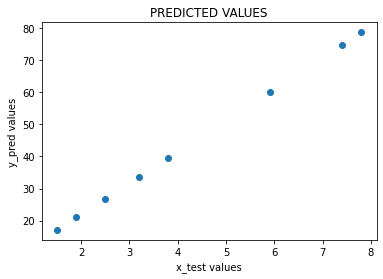

In [14]:
#VISUALIZING ACTUAL vs PREDICTED VALUES
plt.scatter(x_test, y_test)
plt.title('ACTUAL VALUES')  
plt.xlabel('x_test values')  
plt.ylabel('y_test values')  
plt.show( )

plt.scatter(x_test, y_pred)
plt.title('PREDICTED VALUES')  
plt.xlabel('x_test values')  
plt.ylabel('y_pred values')  
plt.show( )

In [16]:
#TESTING WITH MY DATA
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


EVAUATING THE ALGORITHM

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Absolute Error: 2.102314868907046
